### This notebook will serve as a sandbox for bespoke visualizations for the project

In [1]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import helper 
import warnings
warnings.filterwarnings('ignore')

# load the data
data = pd.read_csv('../data/merged_data.csv')

data.shape

(1321, 422)

In [17]:
methadone = data[[col for col in data.columns if 'methadone' in col]].iloc[:, :5]
methadone['total_doses'] = methadone.mean(axis=1)
buprenorphine = data[[col for col in data.columns if 'buprenorphine' in col]].iloc[:, :5]
buprenorphine['total_doses'] = buprenorphine.mean(axis=1)


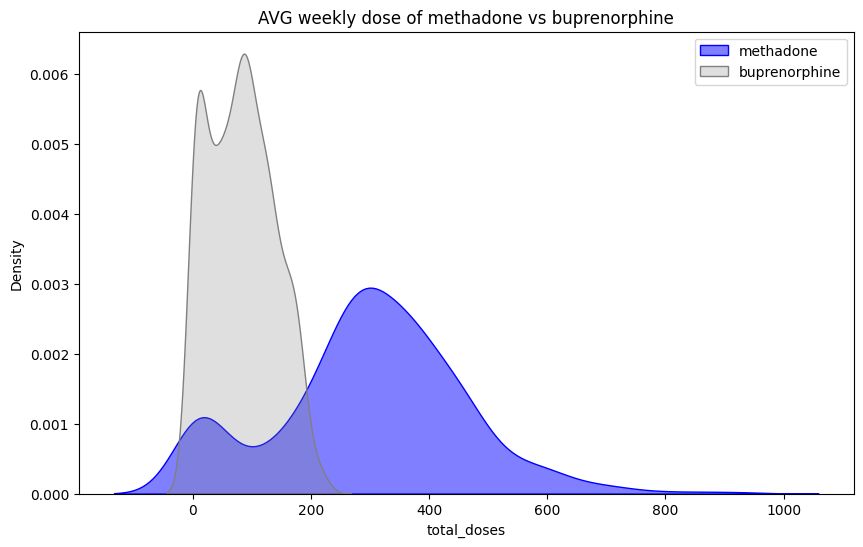

In [19]:
# how do I remove rows that are all 0s?
methadone = methadone.loc[~(methadone==0).all(axis=1)]
buprenorphine = buprenorphine.loc[~(buprenorphine==0).all(axis=1)]

# plot density plot
plt.figure(figsize=(10, 6))
sns.kdeplot(methadone['total_doses'], shade=True, color='blue', alpha=0.5)
sns.kdeplot(buprenorphine['total_doses'], shade=True, color='gray')
plt.title('AVG weekly dose of methadone vs buprenorphine')
plt.legend(['methadone', 'buprenorphine'])
plt.show()


In [ ]:

# plot density plot
plt.figure(figsize=(10, 6))
sns.kdeplot(methadone['total_doses'], shade=True, color='blue', alpha=0.5)
sns.kdeplot(buprenorphine['total_doses'], shade=True, color='gray')
plt.title('Total dose of methadone and buprenorphine')
plt.legend(['methadone', 'buprenorphine'])
plt.show()



In [ ]:
data[[col for col in data.columns if 'meds_' in col]].describe()

In [ ]:
# create a density plot for the target variable
plt.figure(figsize=(10, 6))
sns.kdeplot(data['dropout'], shade=True, color='lightgray', label='dropout')
plt.title('Density Plot for Dropout')
plt.show()

### Build a Dataframe with Time Series for Plotting
- We will create a multi-layered plot that shows insight on patient population treatment response
- To create a multi-layered plot, we will create 3 different series, representing:
    - Total Positive Test Rates for Patient Population
    - Total Negative Test Rates for Methadone Patient Group
    - Total Negative Test Rates for Buprenorphine Patient Group
<br><br>
We will create a bar plot for the total positive test rates and line plots for the negative test rates for each patient group<br>

In [ ]:
# create the test dataframe, use list comprehension to call all columns that start with 'test_Opiate300'
# then add the medication column at the end to filter the data
tests = data[[col for col in data.columns if col.startswith('test_Opiate300')]+['medication']]

# remove the column names to create a test matrix with numbers for columns
tests.columns = tests.columns.str.replace('test_Opiate300_', '')

# there is a value -5 which indicates test results unclear
# count how many times -5 occurs in tests and compare to dataset
tests[tests == -5].count().sum()/tests.size

# the total accounts for .005 of the data, so we can update these to 0
# better not to skew the positive test data as the % of -5 is so low
for col in tests.columns:
    tests[col] = tests[col].replace(-5, 0)

# create methadone test group
methadone = tests[tests['medication'] == 1.0]

# slice off the final column, aggregate cols with sum 
# transform to dataframe and rename column to patient group
methadone = methadone.iloc[:, :-1].sum().to_frame('methadone_group')

# create buprenorphine test group
buprenorphine = tests[tests['medication'] == 2.0]

# slice off the final column, aggregate cols with sum 
# transform to series and rename column to patient group
buprenorphine = buprenorphine.iloc[:, :-1].sum().to_frame('buprenorphine_group')

# merge series
test_results = pd.concat([methadone, buprenorphine], axis=1)

# create total column, sum of both test groups
test_results['total'] = (test_results['methadone_group'] + test_results['buprenorphine_group'])

test_results